# Simple orders analysis

We are finally ready to start analysing our order dataset!

Our objectif is to get an initial understanding of
- `orders` properties
- Their associated `review_scores`

In [1]:
#import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# import your newly coded order training set
from olist.order import Order
orders = Order().get_training_data(with_distance_seller_customer=True)

## 1 - Inspect features

❓ Print summary statistics `DataFrame.describe()` of each columns of the order dataset, and in particular `wait_time`

Plot various histograms to get a sense of each variable distribution.
In particular, create a `sns.FacetGrid()` of histograms for each `review_score`

What do you notice for variables `price` and `freight_value` ? Analyse also `distance_seller_customer` if you have created it in `order.py`

In [5]:
orders.describe()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
count,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000
mean,12.555259,23.744247,0.772981,0.588977,0.100596,4.142005,1.142699,1.013965,136.935472,22.773011,601.058677
std,9.540464,8.769554,4.748411,0.492022,0.300794,1.296748,0.540518,0.123792,208.935017,21.553810,595.216682
min,0.533414,2.008009,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.850000,0.000000,0.000000
25%,6.764236,18.330069,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,45.900000,13.830000,187.358391
50%,10.215972,23.232187,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,86.000000,17.160000,434.070859
75%,15.719502,28.417963,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,149.900000,24.000000,797.860262
max,209.628611,155.135463,188.975081,1.000000,1.000000,5.000000,21.000000,5.000000,13440.000000,1794.960000,8736.947618


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96525 entries, 0 to 96532
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  96525 non-null  object 
 1   wait_time                 96525 non-null  float64
 2   expected_wait_time        96525 non-null  float64
 3   delay_vs_expected         96525 non-null  float64
 4   order_status              96525 non-null  object 
 5   dim_is_five_star          96525 non-null  int64  
 6   dim_is_one_star           96525 non-null  int64  
 7   review_score              96525 non-null  int64  
 8   number_of_products        96525 non-null  int64  
 9   number_of_sellers         96525 non-null  int64  
 10  price                     96525 non-null  float64
 11  freight_value             96525 non-null  float64
 12  distance_seller_customer  96525 non-null  float64
dtypes: float64(6), int64(5), object(2)
memory usage: 10.3+ MB


In [7]:
# Plot distribution for variables available in the dataset

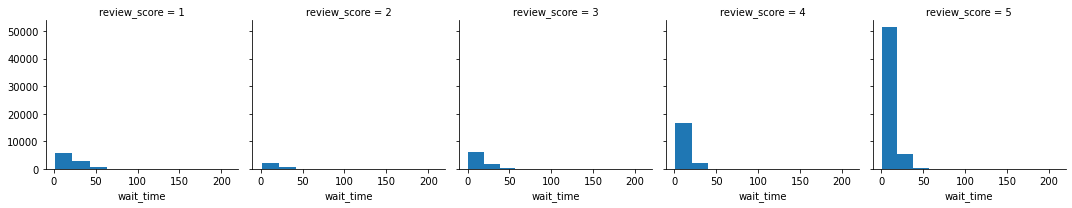

In [20]:
g = sns.FacetGrid(data=orders, col="review_score")
g.map(plt.hist, "wait_time")

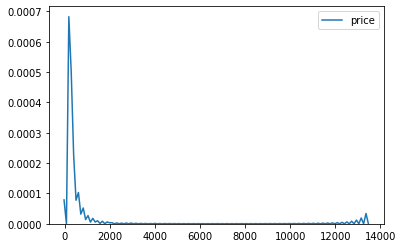

In [22]:
sns.kdeplot(orders['price'])

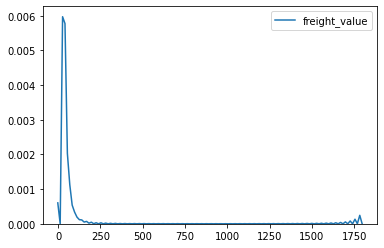

In [11]:
sns.kdeplot(orders['freight_value'])

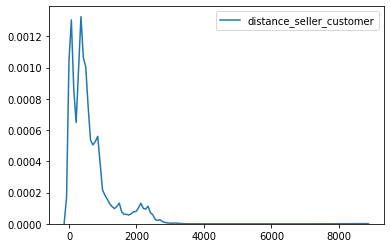

In [21]:
sns.kdeplot(orders['distance_seller_customer'])

----
❓Inspect the various correlations between features: which one seems most correlated with `review_score`?

<details>
    <summary>Hint</summary>

`DataFrame.corr()` combined with `sns.heatmap()`
</details>

In [12]:
# Correlation plot 

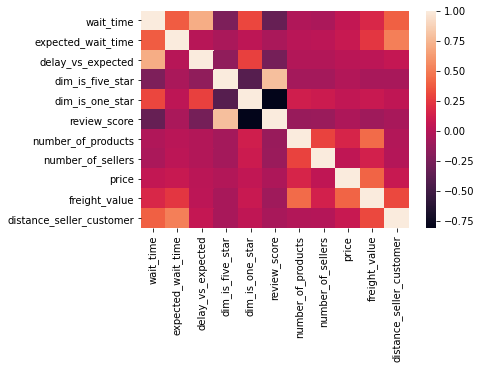

In [14]:
sns.heatmap(orders.corr())

## 2 - Simple regression of `review_score` against delivery duration

It seems that `review_score` is mostly correlated with `wait_time` (r = 33%) and `delay_vs_expected` (r=27%).
Let's investigate these with seaborn

### 2.1 Plots
❓ In one figure, create 2 subplots, that regress `review_score` on `wait_time` and `delay_vs_expected` respectively

- Reduce your dataframe to a random subsample of 10,000 row for speed purpose (a good practice in data exploration)
- use `DataFrame.sample()` with a fixed `random_state` to avoid changing sample at each execution if needed
- Use `sns.regplot()` to plot the regression line
- Add some `y_jitter` parameters to better visualize scatterplot density
- Limit `xlim` and `ylim` to hide outliers

In [28]:
sample = orders.sample(10000, random_state=42)

(0.0, 5.927153504674816)

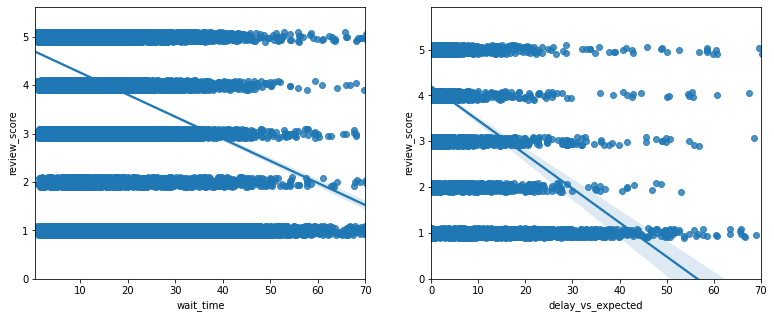

In [29]:
# YOUR PLOT HERE
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.regplot(x = sample.wait_time, y= sample.review_score, y_jitter=.1, ci=0.99)
plt.xlim(right=70)
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = sample.delay_vs_expected, y= sample.review_score, y_jitter=.1)
plt.xlim(right=70)
plt.ylim(bottom=0)

### 2.2 Interpretation

❓Try to visually 'compute' the `slope` of each curve. Write down, in plain english, how would you interpret these coefficients if you were to explain it to a non-datascientist

In [1]:
# Your answer here

<details>
    <summary>Answer</summary>


- Slope wait_time = -0.05 : "For each additional day an order takes to deliver, the review_score on average is reduced by 0.05"
- Slope delay = -0.1 : "For each additional day _above expected_ an order takes to deliver, the review_score on average is reduced by 0.1"

Try to convince yourself intuitively why the latter is the most impactful than the former!

### 2.3 Inferential analysis

These slope coefficients have been computed only for a limited number of orders: 100,000 for the whole dataset, representing only 16 months of data.

**How certain** are we that these coefficients are **statistically significant**? i.e that they do not capture random fluctuations due to the limited observation perdiod, and would not generalize well to future orders (all else being equal)?

We need to estimate **confidence interval** around the mean value for these slope  
$$slope_{wait} = -0.05 ± \ ?? \ \text{[95% interval]} $$
$$slope_{delay} = -0.1 ± \ ?? \ \text{[95% interval]} $$

Fortunately, seaborn already computes this 95% confidence interval for us the shaded blue cone around regression line!

❓Use seaborn `regplot` to visualize the two confidence intervals:
- Change the size of the sample by sub-sampling your dataset: Notice how the slope may change as sample size become smaller. What about the confidence interval?
- Change the size of the confidence interval by playing with regplot `ci` parameter (95% by default)

Text(0.5, 1.0, 'Full dataset (100000 datapoints), Confidence Interval 99%')

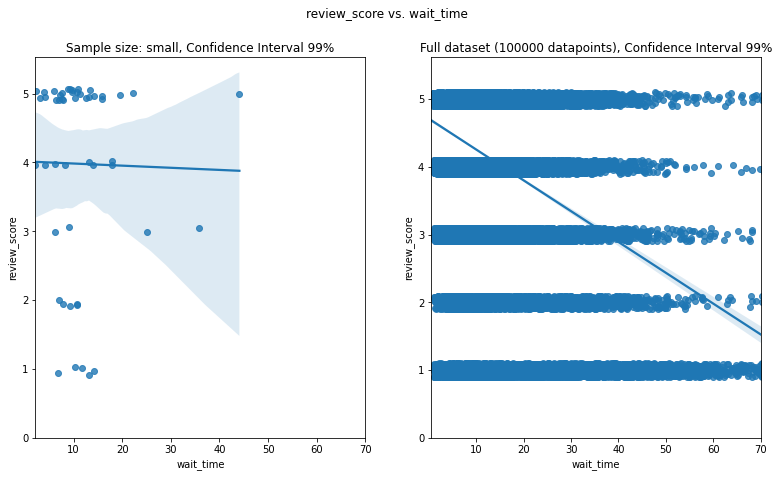

In [38]:
# YOUR PLOT HERE
sample = orders.sample(100, random_state=42)
plt.figure(figsize=(13,7))
plt.suptitle('review_score vs. wait_time')

plt.subplot(1,2,1)
sns.regplot(x = sample.wait_time, y= sample.review_score, y_jitter=.1, ci=99)
plt.xlim(right=70)
plt.ylim(bottom=0)
plt.title("Sample size: small, Confidence Interval 99%")

plt.subplot(1,2,2)
sns.regplot(x = orders.wait_time, y= orders.review_score, y_jitter=.1, ci=99)
plt.xlim(right=70)
plt.ylim(bottom=0)
plt.title("Full dataset (100000 datapoints), Confidence Interval 99%")

<details>
    <summary>🔎 Interpretation</summary>

When plotting all our datapoints:
- The 95% confidence interval for the slope does not contains the value 0.
- We are 95% confident that slower deliveries are associated with weaker reviews.
- The `p-value` associated with the null-hypothesis "review_score are not related with delivery duration" is close to 0, and we could safely reject this hypothesis

$\implies$ Our findings are said to be **statistically significant**. 

However, **correlation does not implies causality**. It may well be that some products, which happen to be inherently slow to deliver on average (heavy ones maybe?), also happen to have consistent low review_score, whatever time it takes to be delivered. Identifying these **confounding factor** is crucial and cannot be done with simple univariate regression. We will see tomorrow the power of multivariate linear regression for that matter. 
</details>



🏁 Congratulation! Don't forget to commit and push your notebook